# Dataset  Analysis

>In this case study, a HR dataset was sourced from General Electrics (GE)  which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

## Importing Python Libraries

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
#from plotly import plotly as py
import chart_studio.plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

In [3]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

# Importing the data

>Importing the dataset and making a copy of the source file for the analysis.
The dataset contains 1470 rows and 35 columns

In [88]:
# Read Excel file
df_attritionfile = pd.read_excel('EmployeeAttritionData.xlsx')
print("Shape of dataframe is: {}".format(df_attritionfile.shape))

Shape of dataframe is: (1270, 35)


In [6]:
# Make a copy of original data set source file
df_ATTR = df_attritionfile.copy()

# Data Description and Exploratory Visualizations

>The section will provide data visualizations that summarizes or extracts relevant characteristics of features in out dataset.  We will look at each column in detail, get a better understanding of the dataset, and group them together when appropriate. {CRISP-DM -- Data Understanding}

## Overview

In [7]:
# Dataset columns
df_ATTR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Dataset header
df_ATTR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


>The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [9]:
# Breaking down the columns by their type ( i.e. int64, float64, object)
df_ATTR.columns.to_series().groupby(df_ATTR.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [10]:
# Columns datatypes and missing values
df_ATTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1270 non-null   int64 
 1   Attrition                 1270 non-null   object
 2   BusinessTravel            1270 non-null   object
 3   DailyRate                 1270 non-null   int64 
 4   Department                1270 non-null   object
 5   DistanceFromHome          1270 non-null   int64 
 6   Education                 1270 non-null   int64 
 7   EducationField            1270 non-null   object
 8   EmployeeCount             1270 non-null   int64 
 9   EmployeeNumber            1270 non-null   int64 
 10  EnvironmentSatisfaction   1270 non-null   int64 
 11  Gender                    1270 non-null   object
 12  HourlyRate                1270 non-null   int64 
 13  JobInvolvement            1270 non-null   int64 
 14  JobLevel                

>The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file. However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadhsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

### Numerical features overview

In [11]:
df_ATTR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.0,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.0,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,36.863780,797.135433,9.135433,2.925197,1.0,1143.535433,2.712598,65.873228,2.727559,2.060630,2.714173,6480.437008,14264.179528,2.691339,15.151969,3.149606,2.688976,80.0,0.798425,11.220472,2.805512,2.766142,6.914173,4.178740,2.154331,4.067717
std,9.057275,403.115079,8.045120,1.029086,0.0,561.172683,1.104507,20.293834,0.717745,1.094557,1.102774,4649.575392,7129.360451,2.497754,3.634793,0.356826,1.076340,0.0,0.856255,7.770155,1.279332,0.698723,5.940581,3.565046,3.198915,3.550178
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,458.250000,2.000000,2.000000,1.0,707.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2936.000000,8003.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,792.500000,7.000000,3.000000,1.0,1163.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4945.500000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1153.000000,13.000000,4.000000,1.0,1622.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8260.250000,20428.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


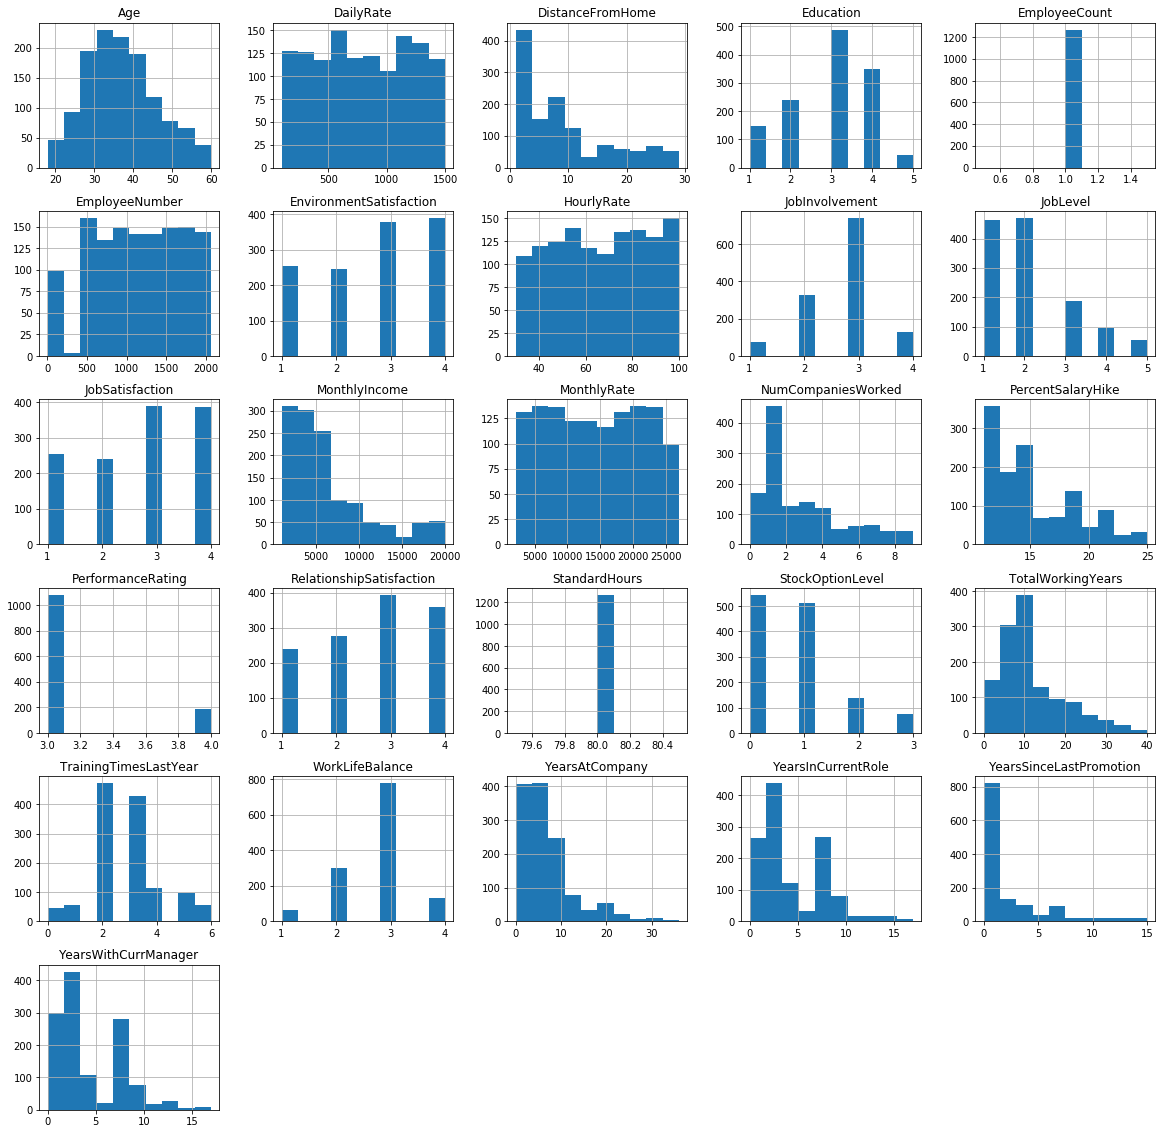

In [12]:
df_ATTR.hist(figsize=(20,20))
plt.show()

>A few observations can be made based on the information and histograms for numerical features:
>
>  - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
>  - Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
>  - EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.
>  - Employee Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.

### Feature distribution by target attribute

#### Age

> The age distriution for Active and Ex-employees only differs by one year.
The average age of ex-employees is **33.6** years old, while **37.6** is the average age for current employees

In [13]:
(mu, sigma) = norm.fit(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'Age'])
print(
    'Ex-exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'Age'])
print('Current exmployees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-exmployees: average age = 33.8 years old and standard deviation = 9.6
Current exmployees: average age = 37.5 years old and standard deviation = 8.8


>Let's create a kernel density estimation (KDE) plot colored by the value of the target. A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. It will allow us to identify if there is a correlation between the Age of the Client and their ability to pay it back.

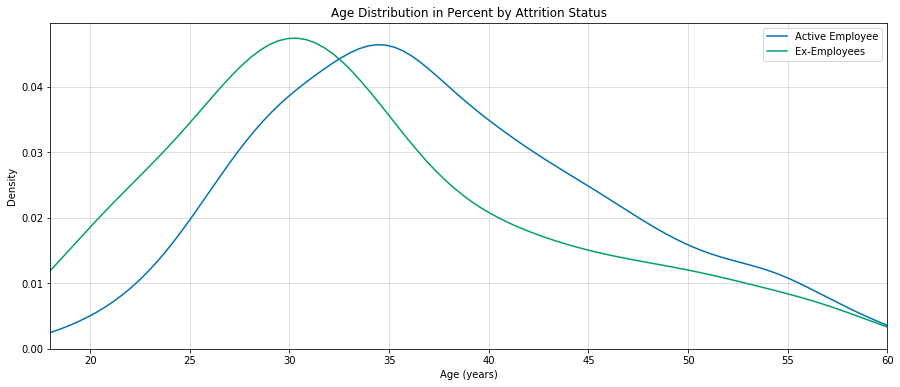

In [14]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Age Distribution in Percent by Attrition Status');

#### Education

>Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

In [15]:
# Education Field of employees
df_ATTR['EducationField'].value_counts()

Life Sciences       526
Medical             393
Marketing           136
Technical Degree    114
Other                78
Human Resources      23
Name: EducationField, dtype: int64

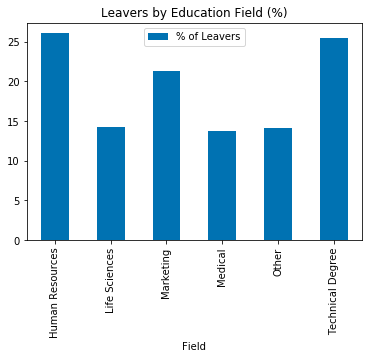

In [16]:
df_EducationField = pd.DataFrame(columns=["Field", "% of Leavers"])
i=0
for field in list(df_ATTR['EducationField'].unique()):
    ratio = df_ATTR[(df_ATTR['EducationField']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['EducationField']==field].shape[0]
    df_EducationField.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_EF = df_EducationField.groupby(by="Field").sum()
df_EF.plot(kind='bar',title='Leavers by Education Field (%)')

#### Gender

> Gender distribution shows that the dataset features a higher relative proportion of male ex-employees than female ex-employees, with normalised gender distribution of ex-employees in the dataset at 17.0% for Males and 14.8% for Females.

In [17]:
df_ATTR['Gender'].value_counts()

Male      761
Female    509
Name: Gender, dtype: int64

In [18]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (
    df_ATTR['Gender'] == 'Male')].shape[0] / df_ATTR[df_ATTR['Gender'] == 'Male'].shape[0])*100, (df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['Gender'] == 'Female')].shape[0] / df_ATTR[df_ATTR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 16.8%; Female 14.9%.


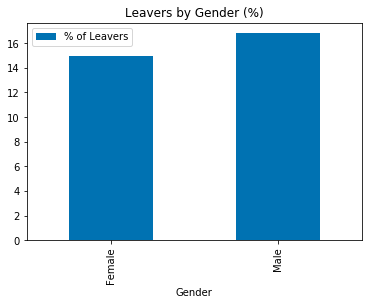

In [19]:
df_Gender = pd.DataFrame(columns=["Gender", "% of Leavers"])
i=0
for field in list(df_ATTR['Gender'].unique()):
    ratio = df_ATTR[(df_ATTR['Gender']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['Gender']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_G = df_Gender.groupby(by="Gender").sum()
df_G.plot(kind='bar',title='Leavers by Gender (%)')

#### Marital Status

>The dataset features three marital status: Married (673 employees), Single (470 employees), Divorced (327 employees).
Single employees show the largest proportion of leavers at 25%.

In [20]:
df_ATTR['MaritalStatus'].value_counts()

Married     588
Single      404
Divorced    278
Name: MaritalStatus, dtype: int64

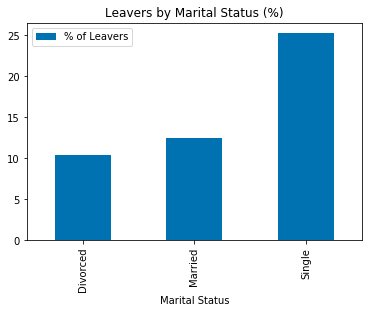

In [21]:
df_Marital = pd.DataFrame(columns=["Marital Status", "% of Leavers"])
i=0
for field in list(df_ATTR['MaritalStatus'].unique()):
    ratio = df_ATTR[(df_ATTR['MaritalStatus']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['MaritalStatus']==field].shape[0]
    df_Marital.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_MF = df_Marital.groupby(by="Marital Status").sum()
df_MF.plot(kind='bar',title='Leavers by Marital Status (%)')

#### Distance from Home

>Distance from home for employees to get to work varies from 1 to 29 miles. There is no discernable strong correlation between Distance from Home and Attrition Status as per the KDE plot below.

In [22]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_ATTR['DistanceFromHome'].min(),
                                                                                       df_ATTR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [23]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_ATTR[df_ATTR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_ATTR[df_ATTR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.91 miles and ex-employees: 10.32 miles


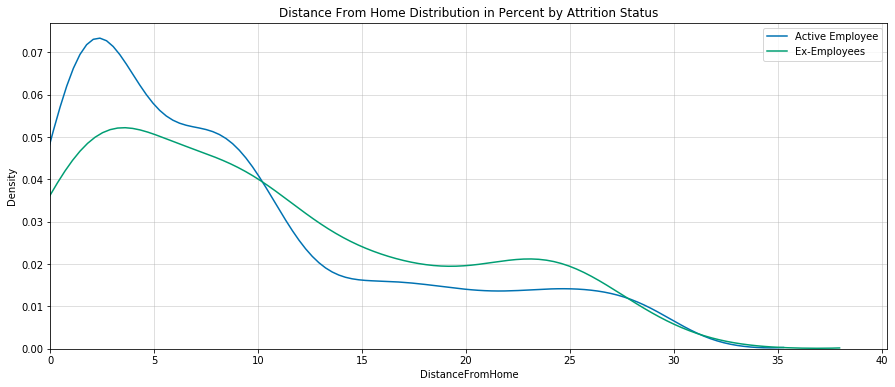

In [24]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

#### Department

>The data features employee data from three departments: Research & Development, Sales, and Human Resources.

In [25]:
# The organisation consists of several departments
df_ATTR['Department'].value_counts()

Research & Development    820
Sales                     393
Human Resources            57
Name: Department, dtype: int64

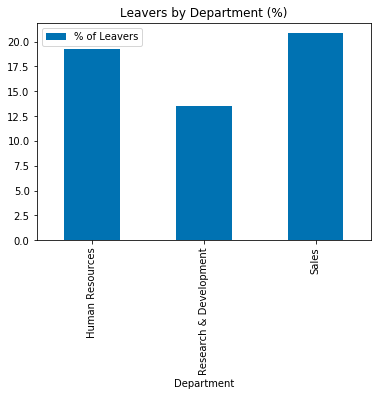

In [26]:
df_Department = pd.DataFrame(columns=["Department", "% of Leavers"])
i=0
for field in list(df_ATTR['Department'].unique()):
    ratio = df_ATTR[(df_ATTR['Department']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['Department']==field].shape[0]
    df_Department.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_DF = df_Department.groupby(by="Department").sum()
df_DF.plot(kind='bar',title='Leavers by Department (%)')

#### Role and Work Conditions

>A preliminary look at the relationship between Business Travel frequency and Attrition Status shows that there is a largest normalized proportion of Leavers for employees that travel "frequently". Travel metrics associated with Business Travel status were not disclosed (i.e. how many hours of Travel is considered "Frequent").

In [27]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_ATTR['BusinessTravel'].value_counts()

Travel_Rarely        908
Travel_Frequently    235
Non-Travel           127
Name: BusinessTravel, dtype: int64

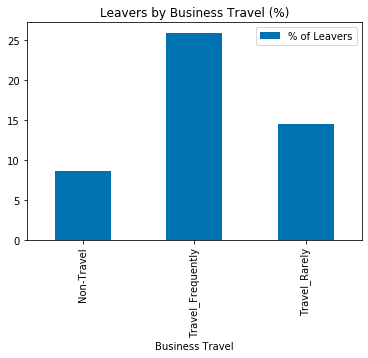

In [28]:
df_BusinessTravel = pd.DataFrame(columns=["Business Travel", "% of Leavers"])
i=0
for field in list(df_ATTR['BusinessTravel'].unique()):
    ratio = df_ATTR[(df_ATTR['BusinessTravel']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['BusinessTravel']==field].shape[0]
    df_BusinessTravel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_BT = df_BusinessTravel.groupby(by="Business Travel").sum()
df_BT.plot(kind='bar',title='Leavers by Business Travel (%)')

>Several Job Roles are listed in the dataset: Sales Executive, Research Scientist, Laboratory Technician, Manufacturing Director, Healthcare Representative, Manager, Sales Representative, Research Director, Human Resources.

In [29]:
# Employees in the database have several roles on-file
df_ATTR['JobRole'].value_counts()

Sales Executive              287
Research Scientist           243
Laboratory Technician        222
Manufacturing Director       125
Healthcare Representative    117
Manager                       83
Sales Representative          75
Research Director             70
Human Resources               48
Name: JobRole, dtype: int64

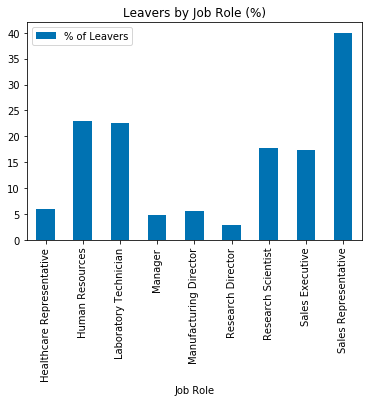

In [30]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df_ATTR['JobRole'].unique()):
    ratio = df_ATTR[(df_ATTR['JobRole']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
df_JR.plot(kind='bar',title='Leavers by Job Role (%)')

>Employees have an assigned level within the organisation which varies from 1 (staff) to 5 (managerial/director). Employees with an assigned Job Level of "1" show the largest normalized proportion of Leavers.

In [31]:
df_ATTR['JobLevel'].value_counts()

2    470
1    464
3    186
4     95
5     55
Name: JobLevel, dtype: int64

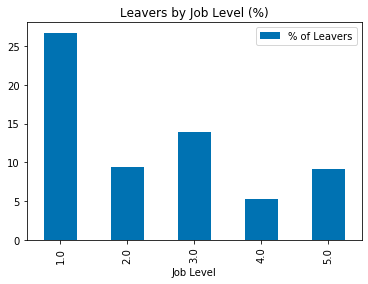

In [32]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df_ATTR['JobLevel'].unique()):
    ratio = df_ATTR[(df_ATTR['JobLevel']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
df_JL.plot(kind='bar',title='Leavers by Job Level (%)')

>A ranking is associated to the employee's Job Involvement :1 'Low' 2 'Medium' 3 'High' 4 'Very High'. The plot below indicates a negative correlation with the Job Involvement of an employee and the Attrition Status. In other words, employees with higher Job Involvement are less likely to leave.

In [33]:
df_ATTR['JobInvolvement'].value_counts()

3    741
2    328
4    128
1     73
Name: JobInvolvement, dtype: int64

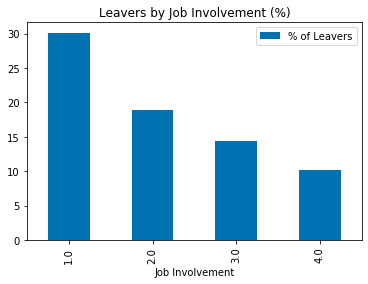

In [34]:
df_JobInvolvement = pd.DataFrame(columns=["Job Involvement", "% of Leavers"])
i=0
for field in list(df_ATTR['JobInvolvement'].unique()):
    ratio = df_ATTR[(df_ATTR['JobInvolvement']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['JobInvolvement']==field].shape[0]
    df_JobInvolvement.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JI = df_JobInvolvement.groupby(by="Job Involvement").sum()
df_JI.plot(kind='bar',title='Leavers by Job Involvement (%)')

>The data indicates that employees may have access to some Training. A feature indicates how many years it's been since the employee attended such training.

In [35]:
print("Number of training times last year varies from {} to {} years.".format(
    df_ATTR['TrainingTimesLastYear'].min(), df_ATTR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


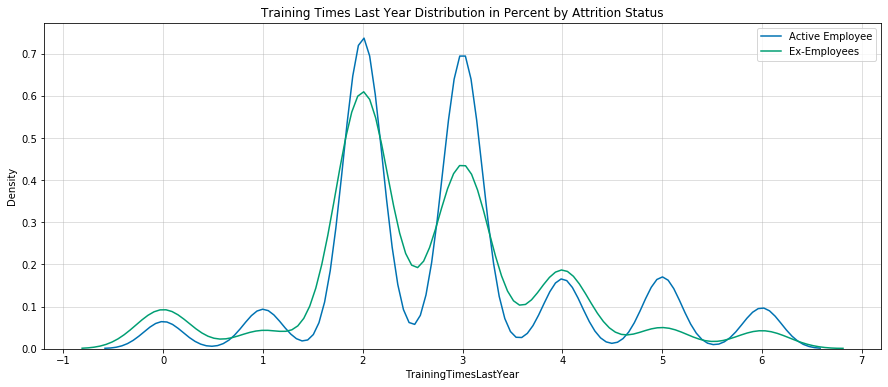

In [36]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

>There is a feature for the number of companies the employee has worked at.
0 likely indicates that according to records, the employee has only worked at this company

In [37]:
df_ATTR['NumCompaniesWorked'].value_counts()

1    453
0    169
3    139
2    125
4    119
7     65
6     62
5     51
9     44
8     43
Name: NumCompaniesWorked, dtype: int64

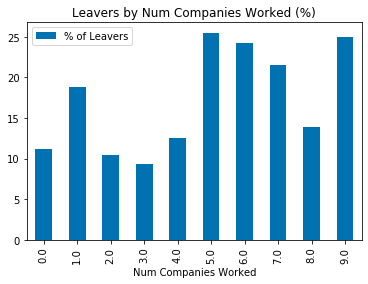

In [38]:
df_NumCompaniesWorked = pd.DataFrame(columns=["Num Companies Worked", "% of Leavers"])
i=0
for field in list(df_ATTR['NumCompaniesWorked'].unique()):
    ratio = df_ATTR[(df_ATTR['NumCompaniesWorked']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['NumCompaniesWorked']==field].shape[0]
    df_NumCompaniesWorked.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_NC = df_NumCompaniesWorked.groupby(by="Num Companies Worked").sum()
df_NC.plot(kind='bar',title='Leavers by Num Companies Worked (%)')

> The percentage of employees that have left the company worked at 5 companies before working at GE and the next highest percentage of leavers worked at 9 comapnies before working at GE.

#### Years at the Company

In [39]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_ATTR['YearsAtCompany'].min(), df_ATTR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 36 years.


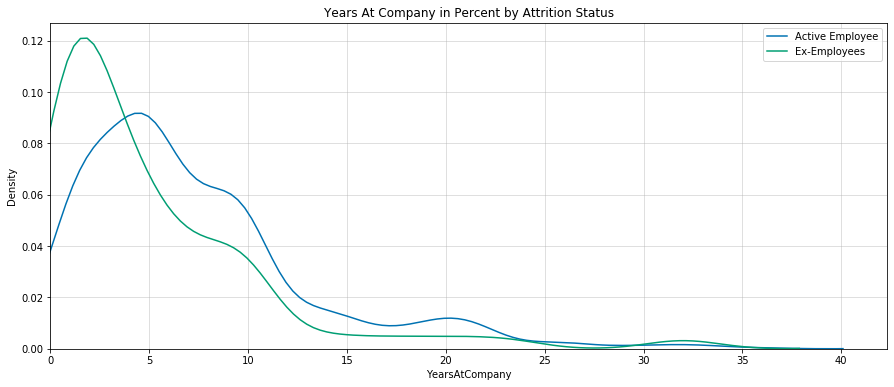

In [40]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [41]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_ATTR['YearsInCurrentRole'].min(), df_ATTR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 17 years.


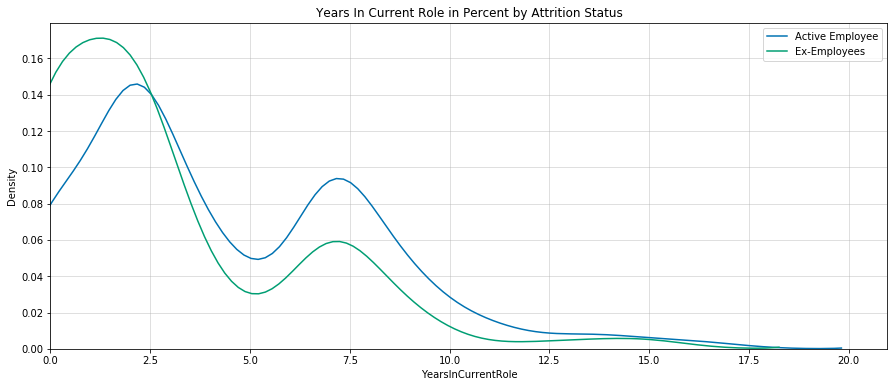

In [42]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [43]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_ATTR['YearsSinceLastPromotion'].min(), df_ATTR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


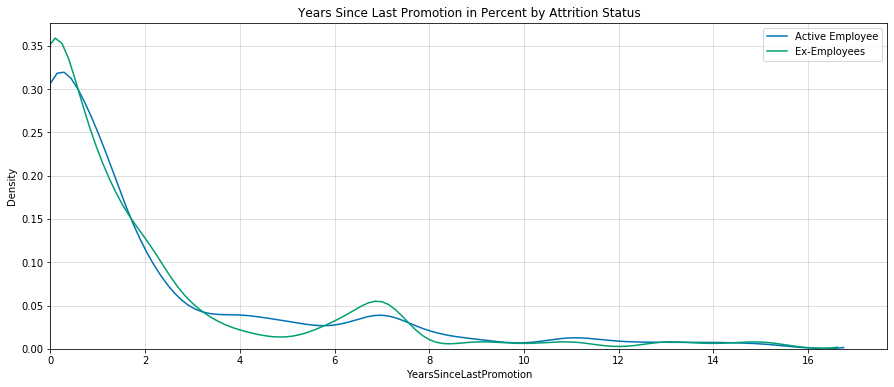

In [44]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [45]:
print("Total working years varies from {} to {} years.".format(
    df_ATTR['TotalWorkingYears'].min(), df_ATTR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


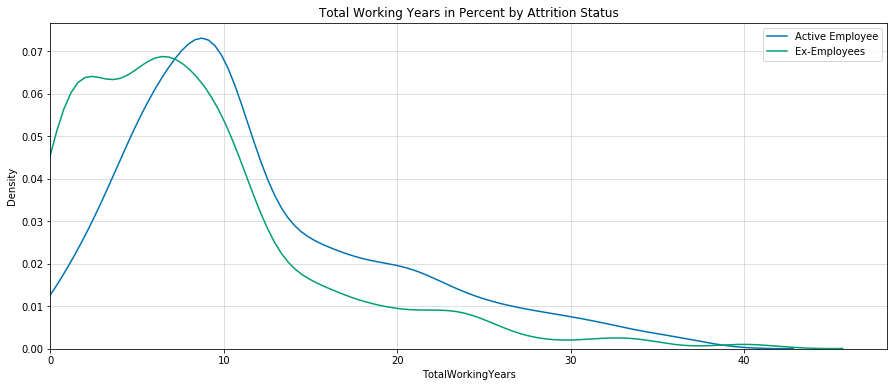

In [46]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

#### Years With Current Manager

In [47]:
print("Number of Years wit current manager varies from {} to {} years.".format(
    df_ATTR['YearsWithCurrManager'].min(), df_ATTR['YearsWithCurrManager'].max()))

Number of Years wit current manager varies from 0 to 17 years.


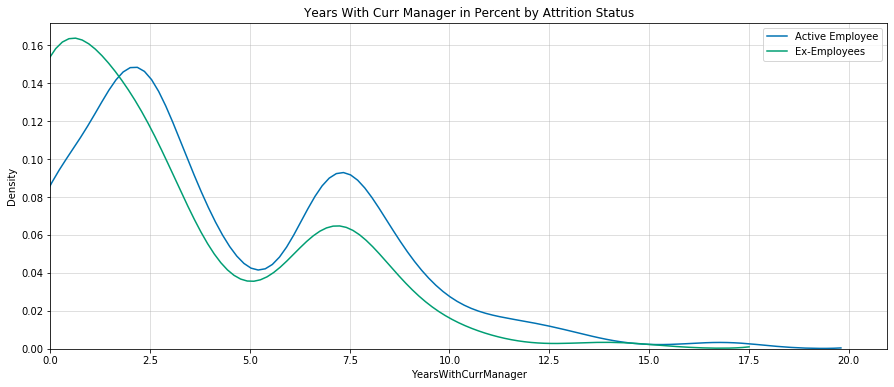

In [48]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

#### Work-Life Balance Score

> A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'. The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

In [49]:
df_ATTR['WorkLifeBalance'].value_counts()

3    776
2    298
4    131
1     65
Name: WorkLifeBalance, dtype: int64

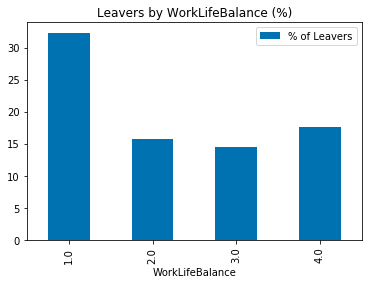

In [50]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df_ATTR['WorkLifeBalance'].unique()):
    ratio = df_ATTR[(df_ATTR['WorkLifeBalance']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
df_WLB.plot(kind='bar',title='Leavers by WorkLifeBalance (%)')

> All employees have a standard 80-hour work commitment

In [51]:
df_ATTR['StandardHours'].value_counts()

80    1270
Name: StandardHours, dtype: int64

> Some employees have overtime commitments.  The data cleatly show that there is a significant larger portion of employees with OT that have left the company.

In [52]:
df_ATTR['OverTime'].value_counts()

No     907
Yes    363
Name: OverTime, dtype: int64

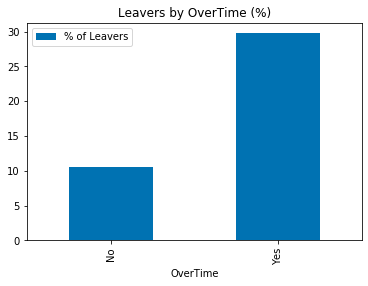

In [53]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df_ATTR['OverTime'].unique()):
    ratio = df_ATTR[(df_ATTR['OverTime']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
df_OT.plot(kind='bar',title='Leavers by OverTime (%)')

#### Pay/Salary Employee Information

In [54]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_ATTR['HourlyRate'].min(), df_ATTR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [55]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_ATTR['DailyRate'].min(), df_ATTR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [56]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_ATTR['MonthlyRate'].min(), df_ATTR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [57]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_ATTR['MonthlyIncome'].min(), df_ATTR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19973.


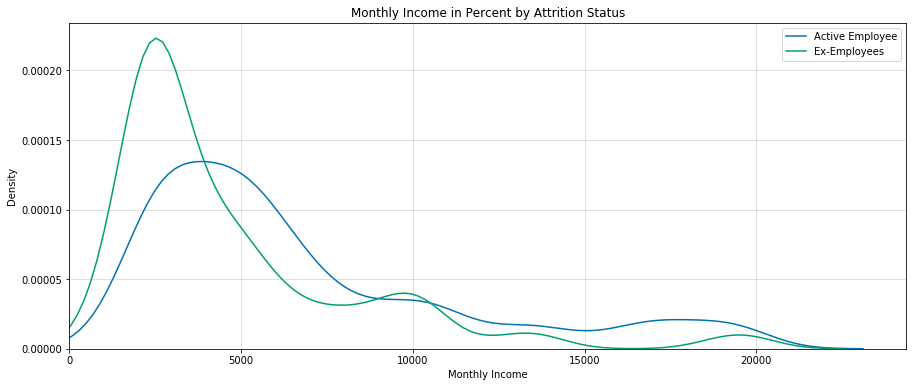

In [58]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

In [59]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    df_ATTR['PercentSalaryHike'].min(), df_ATTR['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


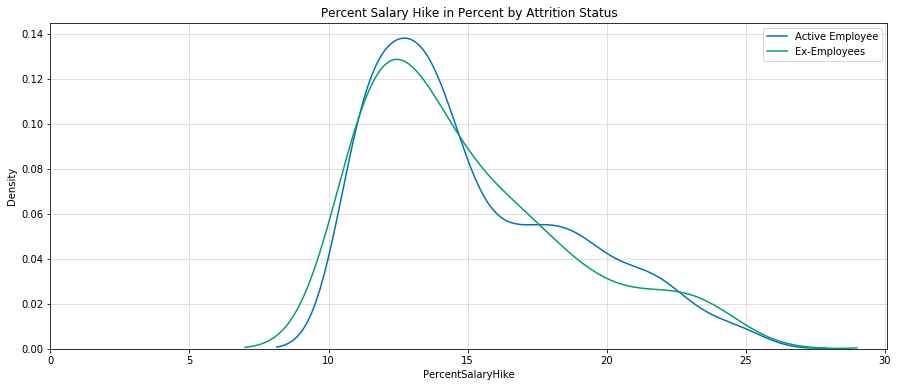

In [60]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(df_ATTR.loc[df_ATTR['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

In [61]:
print("Stock Option Levels varies from {} to {}.".format(
    df_ATTR['StockOptionLevel'].min(), df_ATTR['StockOptionLevel'].max()))

Stock Option Levels varies from 0 to 3.


In [62]:
print("Normalised percentage of leavers by Stock Option Level: 1: {:.2f}%, 2: {:.2f}%, 3: {:.2f}%".format(
    df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['StockOptionLevel'] == 1)
          ].shape[0] / df_ATTR[df_ATTR['StockOptionLevel'] == 1].shape[0]*100,
    df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['StockOptionLevel'] == 2)
          ].shape[0] / df_ATTR[df_ATTR['StockOptionLevel'] == 1].shape[0]*100,
    df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['StockOptionLevel'] == 3)].shape[0] / df_ATTR[df_ATTR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 1: 9.75%, 2: 2.14%, 3: 2.53%


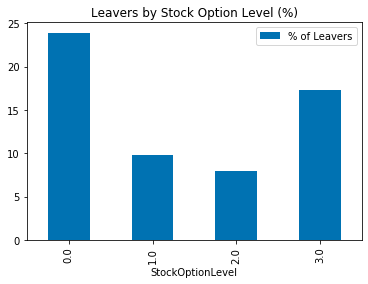

In [63]:
df_StockOptionLevel = pd.DataFrame(columns=["StockOptionLevel", "% of Leavers"])
i=0
for field in list(df_ATTR['StockOptionLevel'].unique()):
    ratio = df_ATTR[(df_ATTR['StockOptionLevel']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['StockOptionLevel']==field].shape[0]
    df_StockOptionLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_SOL = df_StockOptionLevel.groupby(by="StockOptionLevel").sum()
df_SOL.plot(kind='bar',title='Leavers by Stock Option Level (%)')

#### Employee Satisfaction and Performance Information

>Environment Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Environment Satisfaction score increases.

In [64]:
df_ATTR['EnvironmentSatisfaction'].value_counts()

4    390
3    379
1    254
2    247
Name: EnvironmentSatisfaction, dtype: int64

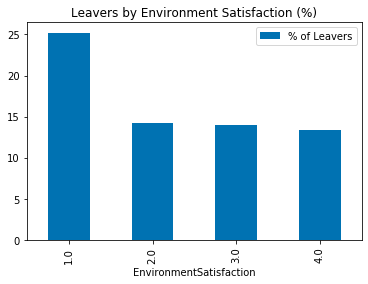

In [65]:
df_EnvironmentSatisfaction = pd.DataFrame(columns=["EnvironmentSatisfaction", "% of Leavers"])
i=0
for field in list(df_ATTR['EnvironmentSatisfaction'].unique()):
    ratio = df_ATTR[(df_ATTR['EnvironmentSatisfaction']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['EnvironmentSatisfaction']==field].shape[0]
    df_EnvironmentSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_Env = df_EnvironmentSatisfaction.groupby(by="EnvironmentSatisfaction").sum()
df_Env.plot(kind='bar',title='Leavers by Environment Satisfaction (%)')

>Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'.
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

In [66]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
df_ATTR['JobSatisfaction'].value_counts()

3    388
4    387
1    255
2    240
Name: JobSatisfaction, dtype: int64

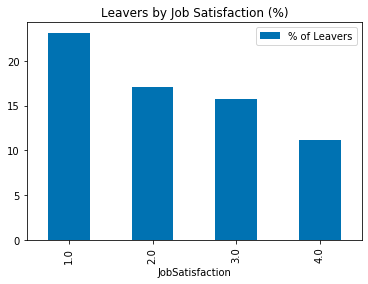

In [67]:
df_JobSatisfaction = pd.DataFrame(columns=["JobSatisfaction", "% of Leavers"])
i=0
for field in list(df_ATTR['JobSatisfaction'].unique()):
    ratio = df_ATTR[(df_ATTR['JobSatisfaction']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['JobSatisfaction']==field].shape[0]
    df_JobSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JS = df_JobSatisfaction.groupby(by="JobSatisfaction").sum()
df_JS.plot(kind='bar',title='Leavers by Job Satisfaction (%)')

>Relationship Satisfaction was captured as: 1 'Low', 2 'Medium', 3 'High', 4 'Very High'.

In [68]:
df_ATTR['RelationshipSatisfaction'].value_counts()

3    394
4    360
2    277
1    239
Name: RelationshipSatisfaction, dtype: int64

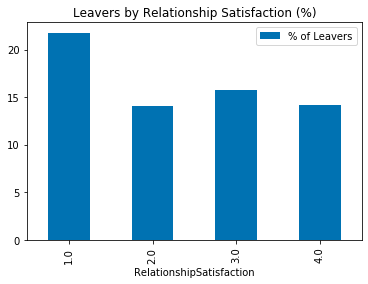

In [69]:
df_RelationshipSatisfaction = pd.DataFrame(columns=["RelationshipSatisfaction", "% of Leavers"])
i=0
for field in list(df_ATTR['RelationshipSatisfaction'].unique()):
    ratio = df_ATTR[(df_ATTR['RelationshipSatisfaction']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['RelationshipSatisfaction']==field].shape[0]
    df_RelationshipSatisfaction.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_RS = df_RelationshipSatisfaction.groupby(by="RelationshipSatisfaction").sum()
df_RS.plot(kind='bar',title='Leavers by Relationship Satisfaction (%)')

>Employee Performance Rating was captured as: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

In [70]:
df_ATTR['PerformanceRating'].value_counts()

3    1080
4     190
Name: PerformanceRating, dtype: int64

In [71]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['PerformanceRating'] == 3)
          ].shape[0] / df_ATTR[df_ATTR['StockOptionLevel'] == 1].shape[0]*100,
    df_ATTR[(df_ATTR['Attrition'] == 'Yes') & (df_ATTR['PerformanceRating'] == 4)].shape[0] / df_ATTR[df_ATTR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 34.31%, 4: 5.46%


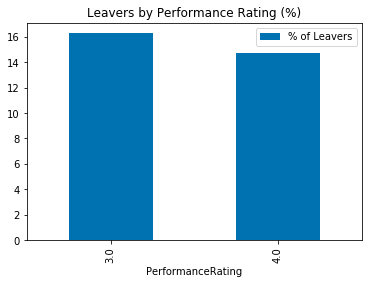

In [72]:
df_PerformanceRating = pd.DataFrame(columns=["PerformanceRating", "% of Leavers"])
i=0
for field in list(df_ATTR['PerformanceRating'].unique()):
    ratio = df_ATTR[(df_ATTR['PerformanceRating']==field)&(df_ATTR['Attrition']=="Yes")].shape[0] / df_ATTR[df_ATTR['PerformanceRating']==field].shape[0]
    df_PerformanceRating.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_PR = df_PerformanceRating.groupby(by="PerformanceRating").sum()
df_PR.plot(kind='bar',title='Leavers by Performance Rating (%)')

#### Target Variable: Attrition

>The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

In [73]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_ATTR['Attrition'].value_counts()

No     1066
Yes     204
Name: Attrition, dtype: int64

In [74]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_ATTR[df_ATTR['Attrition'] == 'No'].shape[0] / df_ATTR.shape[0]*100,
    df_ATTR[df_ATTR['Attrition'] == 'Yes'].shape[0] / df_ATTR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [75]:
#df_ATTR['Attrition'].plot(kind='hist', xTitle='Attrition',
                       # yTitle='count', title='Attrition Distribution')

>As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

>Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

### Correlation

>Let's take a look at some of most significant correlations. It is worth remembering that correlation coefficients only measure linear correlations.

In [76]:
# Find correlations with the target and sort
df_ATTR_trans = df_ATTR.copy()
df_ATTR_trans['Target'] = df_ATTR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
df_ATTR_trans = df_ATTR_trans.drop(
    ['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_ATTR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 MonthlyRate          -0.013281
HourlyRate            0.004425
NumCompaniesWorked    0.052363
DistanceFromHome      0.064629
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears      -0.173101
JobLevel               -0.167316
MonthlyIncome          -0.160713
YearsInCurrentRole     -0.159139
YearsWithCurrManager   -0.152767
Name: Target, dtype: float64


> Plotting a heatmap to visualize the correlation between Attrition and these factors

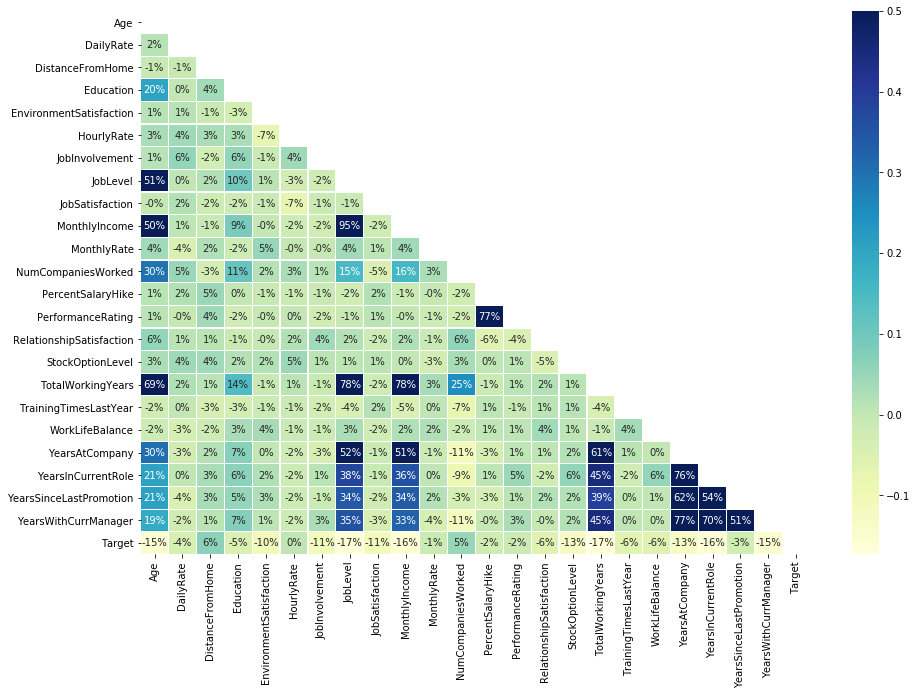

In [77]:
# Calculate correlations
corr = df_ATTR_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt = '.0%',
            linewidths=.2, cmap="YlGnBu")

In [78]:
corr_matrix =  df_ATTR_trans.corr()
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i,j]) > 0.5:
            corr_features.add(corr_matrix.columns[i])
corr_features

{'JobLevel',
 'MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager'}

In [87]:
# removing the columns for from the transformed data for which the value is greater than 0.5
df_ATTR = df_ATTR_trans.drop(columns=list(corr_features), axis=1)
df_ATTR.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Target
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,1,0,0,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,24907,1,No,23,4,1,3,3,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2396,6,Yes,15,2,0,3,3,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,23159,1,Yes,11,3,0,3,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,16632,9,No,12,4,1,3,3,0


>As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

### Exploratory Data Analysis Conclusion

Summarizing findings
> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
> - The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home
> - The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
> - The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
> - Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

Other findings and observations
> - Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
> - About 10% of leavers left when they reach their 2-year anniversary at the company.
> - Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.
> - People who live further away from their work show higher proportion of leavers compared to their counterparts.
> - People who travel frequently show higher proportion of leavers compared to their counterparts.
> - People who have to work overtime show higher proportion of leavers compared to their counterparts.
> - Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
> - Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

# Data Pre-processing / Data Preparation

### Encoding

>Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Lable Encoding and One-Hot Encoding as shown below.

In [80]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [81]:
print(df_ATTR.shape)
df_ATTR.head()

(1270, 23)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Target
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,19479,8,Yes,11,1,0,0,1,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,24907,1,No,23,4,1,3,3,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2396,6,Yes,15,2,0,3,3,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,23159,1,Yes,11,3,0,3,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,16632,9,No,12,4,1,3,3,0


In [82]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_ATTR.columns[1:]:
    if df_ATTR[col].dtype == 'object':
        if len(list(df_ATTR[col].unique())) <= 2:
            le.fit(df_ATTR[col])
            df_ATTR[col] = le.transform(df_ATTR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

2 columns were label encoded.


In [83]:
# convert rest of categorical variable into dummy
df_ATTR = pd.get_dummies(df_ATTR, drop_first=True)

>The resulting dataframe has **49 columns** for 1,470 employees.

In [84]:
print(df_ATTR.shape)
df_ATTR.head()

(1270, 37)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,Target,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,4,19479,8,1,11,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,3,1,61,2,2,24907,1,0,23,4,1,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,4,1,92,2,3,2396,6,1,15,2,0,3,3,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,3,23159,1,1,11,3,0,3,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,1,40,3,2,16632,9,0,12,4,1,3,3,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


#### Feature Scaling

>Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [86]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_ATTR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_ATTR[col] = df_ATTR[col].astype(float)
    df_ATTR[[col]] = scaler.fit_transform(df_ATTR[[col]])
df_ATTR['Attrition'] = pd.to_numeric(df_ATTR['Attrition'], downcast='float')
df_ATTR.head()

KeyError: 'Attrition'

> The above code changes the all numerical variables from a discrete value to continuous value

In [ ]:
print('Size of Full Encoded Dataset: {}'. format(df_ATTR.shape))

#### Splitting data into training and testing data

>Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [ ]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_ATTR[['Attrition']].copy()
target = df_ATTR['Attrition'].copy()

In [ ]:
type(target)

In [ ]:
# let's remove the target feature and redundant features from the dataset
df_ATTR.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_ATTR.shape))

In [ ]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_ATTR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=10,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

### Building ML Models

#### Baseline Algorithms

>Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: **Logistic Regression**, **Random Forest**, **SVM**, **KNN**, **Decision Tree Classifier**, **Gaussian NB**.

In [ ]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=10,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

>Evaluating each model in turn and provide accuracy and standard deviation scores

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

>**Classification Accuracy** is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often **misused** as it is only really suitable when there are an **equal number of observations in each class** and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

>**Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a **model’s ability to discriminate between positive and negative classes**. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

>Based on our ROC AUC comparison analysis, **Logistic Regression** and **Random Forest** show the highest mean AUC scores. We will shortlist these two algorithms for further analysis. See below for more details on these two algos.

>*Logistic Regression* is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark.

>*Random Forest* is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

>Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

### Logistic Regression

>Let's take a closer look at using the Logistic Regression algorithm. I'll be using 10 fold Cross-Validation to train our Logistic Regression Model and estimate its AUC score.

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=10)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

#### Fine-Tuning

>GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [ ]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=10),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

>As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

#### Evaluation

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

>The Confusion matrix provides us with a much more detailed representation of the accuracy score and of what's going on with our labels - we know exactly which/how labels were correctly and incorrectly predicted.

>245 + 43 = 288 true predictions / 16 + 64 = 80 false predictions

In [ ]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

>Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target.
The output provides a first index referring to the probability that the data belong to **class 0** (employee not leaving), and the second refers to the probability that the data belong to **class 1** (employee leaving).

In [ ]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

>The resulting **AUC score: 0.871** is higher than that best score during the optimisation step. Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.

### Random Forest Classifier

>Let's take a closer look at using the Random Forest algorithm. I'll fine-tune the Random Forest algorithm's hyper-parameters by cross-validation against the AUC score.

#### Fine-Tuning

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=10)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

>Random Forest allows us to know which features are of the most importance in predicting the target feature ("attrition" in this project). Below, we plot features by their importance.

In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

>Random Forest helped us identify the Top 10 most important indicators (ranked in the table below).

In [ ]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

#### Evaluation

In [ ]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

>The Confusion matrix provides us with a much more detailed representation of the accuracy score and of what's going on with our labels - we know exactly which/how labels were correctly and incorrectly predicted

In [ ]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf_opt.score(X_test, y_test)*100))

In [ ]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

>The resulting **AUC score: 0.777** is lower than that best score during the optimisation step. Predicting probabilities of a particular label provides us with a measure of how likely an employee is to leave the company.

In [ ]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

### ROC Graph

>AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

>As shown above, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.

# Concluding Remarks

## Risk Category

As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoritically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.


Employees can be assigning a "Risk Category" based on the predicted label such that:

- Low-risk for employees with label < 0.6
- Medium-risk for employees with label between 0.6 and 0.8
- High-risk for employees with label > 0.8

## Strategic Retention Plan

- The stronger indicators of people leaving include:
- **Monthly Income**: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
- **Over Time**: people who work overtime are more likelty to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
- **YearsWithCurrManage**: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year. Several metrics can be used here to determine whether action should be taken with a Line Manager:
    - number of employees under managers showing high turnover rates: this would indicate that the organisation's structure may need to be revisit to improve efficiency
    - number of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
    - patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.
- **Age**: Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
- **DistanceFromHome**: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
- **TotalWorkingYears**: The more experienced employees are less likely to leave. Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.
- **YearsAtCompany**: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

A strategic **"Retention Plan"** should be drawn for each **Risk Category** group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for **medium- and high-risk employees** to discuss work conditions. Also, a meeting with those employee's Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.

In [ ]:
825